<a href="https://colab.research.google.com/github/MinsooKwak/Kaggle_note/blob/main/Data_science/lung_cancer_analysis_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle 필사 study하기**

참고 링크: https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/kaggle_data/survey_lung_cancer.csv')

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
print(df['GENDER'].unique())
print(df['LUNG_CANCER'].unique())

['M' 'F']
['YES' 'NO']


**ABOUT DATASET**

- Gender : M, F
- AGE : patient age
- LUNG_CANCER : Yes(Pos), NO(neg)

- 나머지 : {1:no, 2:yes}

In [8]:
df.shape

(309, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Dataset Summary 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [11]:
df.describe(include=object).T

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [14]:
df.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# 중복된 데이터 shape
print(df[df.duplicated()].shape)
# 중복된 데이터 개수
print(f'중복된 데이터 개수 : {df[df.duplicated()].shape[0]}')

(33, 16)
중복된 데이터 개수 : 33


In [22]:
df.drop_duplicates(keep='first', inplace=True)

print(f'중복된 데이터를 제고하고 남은 데이터 개수는 : {df.shape[0]}')

중복된 데이터를 제고하고 남은 데이터 개수는 : 276


In [23]:
sns.set_style('whitegrid')
sns.set_context('poster', font_scale=.7)

palette=  ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

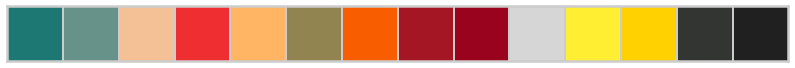

In [26]:
sns.palplot(sns.color_palette(palette))

Digging Deeper

In [28]:
df_temp = df.copy()
df_temp['GENDER'] = df_temp['GENDER'].replace({'M':'Male', 'F':'Female'})

for col in df_temp.columns:
  df_temp[col] = df_temp[col].replace({2:'Yes', 1:'No'})

df_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


Exploring Positive Lung Cancer Cases

In [30]:
df_temp_pos = df_temp[df_temp['LUNG_CANCER']=='YES']
df_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


Exploring Positive Cases's Age Distribution

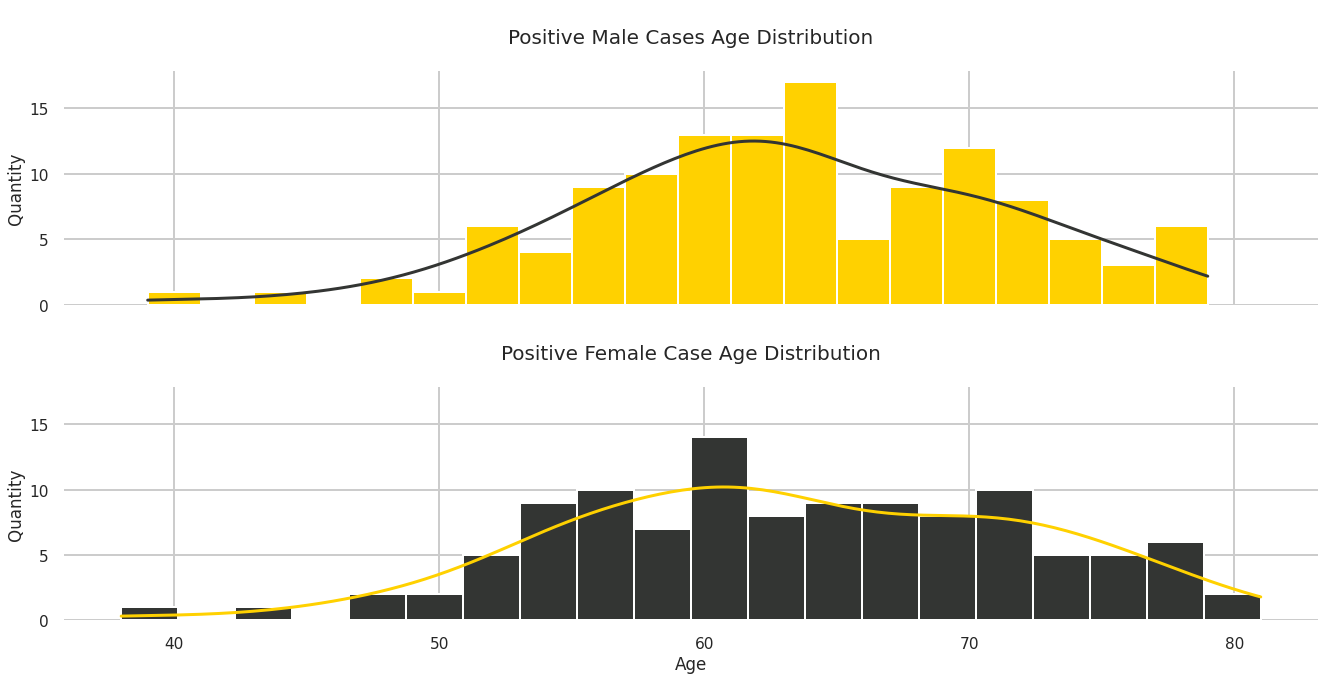

In [38]:
_, axs = plt.subplots(2,1, figsize=(20,10), sharex=True, sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Male']['AGE'], color=palette[11], kde=True, ax=axs[0], bins=20, alpha=1, fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title('\nPositive Male Cases Age Distribution\n', fontsize=20)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Quantity')

sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Female']['AGE'], color=palette[12], kde=True, ax=axs[1], bins=20, alpha=1, fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title('\nPositive Female Case Age Distribution\n', fontsize=20)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Quantity')

sns.despine(left=True, bottom=True)
plt.show()